In [92]:
import pandas as pd
import numpy as np
import re

In [225]:
df_O_PROD = pd.read_csv('O_OPENFF/O_produits.csv')
df_O_PROD.rename(columns={"_id": "EAN13"}, inplace = True)

df_O_PROD['EAN13'] = df_O_PROD['EAN13'] + '.0'
df_O_PROD['O_COUNT'] = 1

df_data = pd.read_csv('N_NIELSEN/N_data_clean.csv')

In [226]:
df_N_FR_FEC = pd.read_csv('N_NIELSEN/N_FRANCE_FEC.csv')

df_N_FR_FEC_VV = df_N_FR_FEC[df_N_FR_FEC['KPI'] == 'Ventes Volume  ']  #espaces à virer

new_cols = ['EAN13_num', 'MARQUE', 'RECETTES', 'ORGANIC', 'WEIGHT_num', 'EMBALLAGE', 'GAMME', 
    'FORMAT', 'COMPTE', 'STD/PROMO', 'ITEM', 'CAM AN-1', 'DERNIER CAM', 'EAN13', 'WEIGHT',
    'NIELSEN_DESCRIPTION', 'INITIAL_INDEX']

df_prod = df_N_FR_FEC_VV.loc[:, new_cols]
df_prod['EAN13'] = df_prod['EAN13'].astype(str)
df_prod['SUMMARY'] = df_prod['MARQUE'] + ', ' + df_prod['EMBALLAGE'] + ', ' + df_prod['GAMME'] + ', '  + df_prod['RECETTES'] + ', '  + df_prod['ORGANIC'].astype(str)# + ', '  + df_prod['WEIGHT'].astype(str)
df_prod['N_COUNT'] = 1

In [227]:
df_prod.shape

(1286, 19)

In [228]:
df_prod['SUMMARY'][0]

'AUT MQ, BRIC, BIO, BASILIC, 1'

In [229]:
df_prod_summary = df_prod[['SUMMARY', 'N_COUNT', 'DERNIER CAM', 'CAM AN-1']].groupby(['SUMMARY']).sum()

In [230]:
df_prod_summary.shape

(687, 3)

In [231]:
df_prod_summary.tail(20)

,N_COUNT,DERNIER CAM,CAM AN-1
SUMMARY,,,
"ZAPETTI BUITONI, POT, LEGUMES, BASILIC, -1",2,0.0,0.0
"ZAPETTI BUITONI, POT, LEGUMES, BASILIC, 0",2,0.0,0.8
"ZAPETTI BUITONI, POT, LEGUMES, CALIENTE ARRABBIATA & PIMENT &, 0",1,2.0,195.0
"ZAPETTI BUITONI, POT, LEGUMES, CHAMPIGNONS & MASCARPONE, 0",2,0.0,193.0
"ZAPETTI BUITONI, POT, LEGUMES, CURRY A LA CORIANDRE, 0",1,0.0,3.1
"ZAPETTI BUITONI, POT, LEGUMES, FROMAGE, 0",2,6.7,522.8
"ZAPETTI BUITONI, POT, LEGUMES, GRECQUE COMPOTEE D'AUBERGINES, 0",1,1.2,181.2
"ZAPETTI BUITONI, POT, LEGUMES, HERB PROV, 0",1,0.0,0.0
"ZAPETTI BUITONI, POT, LEGUMES, NAPOLITAIN, -1",2,4.6,570.2


[Text(0, 0.5, 'number of unit products'), Text(0.5, 0, 'number of formats')]

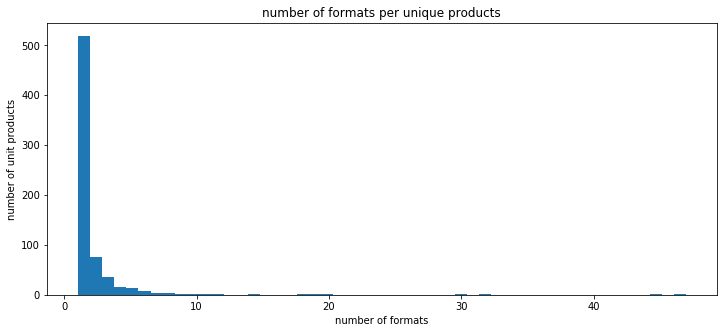

In [232]:
df_prod_summary['N_COUNT'].plot.hist(bins=50, title='number of formats per unique products', figsize=(12,5)).set(xlabel='number of formats', ylabel='number of unit products')

[Text(0, 0.5, 'number of unit products'), Text(0.5, 0, 'number of formats')]

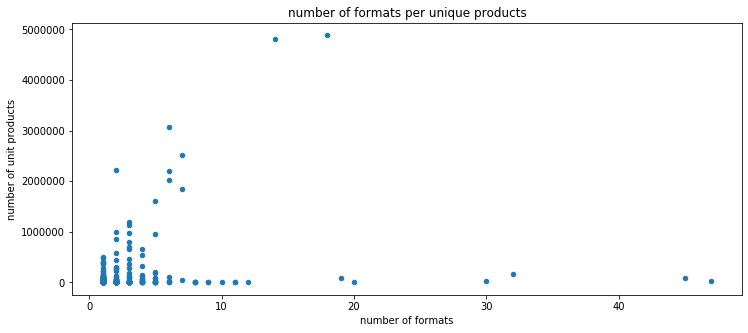

In [233]:
df_prod_summary.plot.scatter(x='N_COUNT', y='DERNIER CAM', title='number of formats per unique products', figsize=(12,5)).set(xlabel='number of formats', ylabel='number of unit products')

In [194]:
df_prod_summary[df_prod_summary['N_COUNT'] > 10]

,COUNT,DERNIER CAM,CAM AN-1
SUMMARY,,,
"AUT MQ, POT, BIO, BASILIC, 1",12,10217.7,3288.5
"AUT MQ, POT, BOLO CLASSIQUE, BOLOGNAISE, 0",32,168415.0,99866.9
"AUT MQ, POT, LEGUMES, ARRABIATA, 0",30,31511.6,30837.3
"AUT MQ, POT, LEGUMES, BASILIC, 0",45,87811.2,84480.8
"AUT MQ, POT, LEGUMES, NAPOLITAIN, 0",11,6762.0,6920.5
"AUT MQ, POT, LEGUMES, NATURE, 0",19,95229.0,95189.4
"AUT MQ, POT, LEGUMES, OLIVE, 0",11,14668.4,13612.7
"AUT MQ, POT, PESTO, PESTO RGE, 0",20,10183.1,13165.5
"AUT MQ, POT, PESTO, PESTO VERD, 0",47,21023.8,24861.9


**Estimation des EAN Manquants**

In [ ]:
#Merge of the two databases

In [236]:
df_M_PROD = df_prod.merge(df_O_PROD, left_on='EAN13', right_on='EAN13', how='left')

In [237]:
df_M_PROD

,EAN13_num,MARQUE,RECETTES,ORGANIC,WEIGHT_num,EMBALLAGE,GAMME,FORMAT,COMPTE,STD/PROMO,...,carbohydrates_100g,sugars_100g,fruits_vegetables_nuts_estimate_from_ingredients_100g,proteins_100g,sodium_100g,salt_100g,nutrition_score_fr_100g,fiber_100g,nova_group_100g,O_COUNT
0,4104420174597,AUT MQ,BASILIC,1,350,BRIC,BIO,MF,1CT,STD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8411916305462,AUT MQ,NATURE,0,215,BRIC,LEGUMES,PF,3CT,STD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8410066127238,HEINZ,AIL OIGNON,-1,0,BRIC,LEGUMES,GF,12CT,PROMO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8410066141869,HEINZ,AIL OIGNON,-1,0,BRIC,LEGUMES,GF,12CT,PROMO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8410066118090,HEINZ,AIL OIGNON,0,520,BRIC,LEGUMES,GF,1CT,STD,...,9.7,8.3,0.00,1.4,0.60000,1.5000,7.0,NaN,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,3038359002823,PANZANI,PT LEGUME,0,180,TUB,LEGUMES,PF,3CT,STD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1282,3038359008498,PANZANI,TOM CUI A L'ORIGAN,0,180,TUB,LEGUMES,PF,1CT,STD,...,14.5,10.0,49.00,2.9,1.16000,2.9000,11.0,1.7,4.0,1.0
1283,3038359005657,PANZANI,PESTO VERD,0,160,TUB,PESTO,PF,1CT,STD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1284,3038359001413,ZAKIA,TOMATE PIMENTE,0,180,TUB,LEGUMES,PF,1CT,STD,...,15.0,8.1,50.05,2.7,1.12000,2.8000,NaN,2.7,4.0,1.0


In [241]:
df_M_PROD_SUM = df_M_PROD[['SUMMARY', 'N_COUNT', 'O_COUNT', 'DERNIER CAM', 'CAM AN-1']].groupby(['SUMMARY']).sum().sort_values(by='DERNIER CAM', ascending=False)

In [242]:
df_M_PROD_SUM

,N_COUNT,O_COUNT,DERNIER CAM,CAM AN-1
SUMMARY,,,,
"PANZANI, POT, BOLO CLASSIQUE, BOLOGNAISE, 0",18,6.0,4883582.2,8350598.1
"PANZANI, POT, LEGUMES, PROVENCALE, 0",14,5.0,4805193.7,4537655.1
"PANZANI, TUB, LEGUMES, PT LEGUME, 0",6,4.0,3071093.9,3081322.4
"PANZANI, POT, LEGUMES, TOMATE CUI, 0",7,0.0,2515152.0,2414803.2
"HEINZ, BRIC, LEGUMES, AIL OIGNON, 0",2,2.0,2227781.6,1915900.0
...,...,...,...,...
"BARILLA, POT, PESTO, TOM SECHE, 0",1,0.0,0.0,0.0
"POLLI, POT, A CUISINER, RISOTTO TOMATES & BASILIC, 0",1,0.0,0.0,0.0
"BUITONI, POT, BOLO CLASSIQUE, BOLOGNAISE, 0",1,0.0,0.0,0.0


In [246]:
temp = df_M_PROD_SUM[df_M_PROD_SUM['DERNIER CAM'] > 500000]

[Text(0, 0.5, 'number of unit products'), Text(0.5, 0, 'sales')]

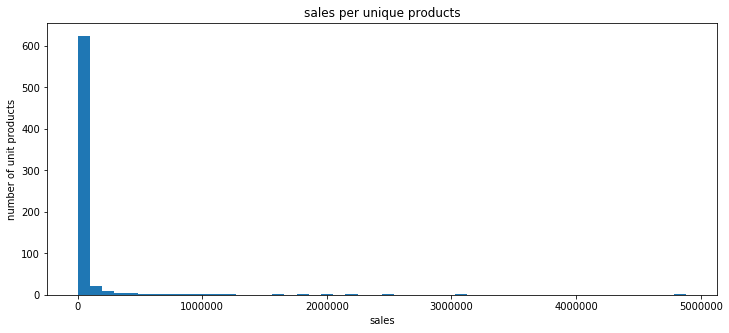

In [243]:
df_M_PROD_SUM['DERNIER CAM'].plot.hist(bins=50, title='sales per unique products', figsize=(12,5)).set(xlabel='sales', ylabel='number of unique products')

In [247]:
temp.shape

(22, 4)

In [253]:
temp.to_excel('sales_500000.xls')

In [248]:
df = pd.read_csv('O_OPENFF/O_produits_EAN13.csv')

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 39 columns):
Unnamed: 0                                               1100 non-null int64
_id                                                      1100 non-null int64
categories                                               665 non-null object
ingredients                                              976 non-null object
nutriments                                               1100 non-null object
product_name                                             1090 non-null object
manufacturing_places                                     213 non-null object
category_properties                                      1096 non-null object
ingredients_text                                         646 non-null object
product_name_fr                                          1063 non-null object
interface_version_modified                               1098 non-null object
ingredients_n                            

In [251]:
3038352874908 in df['_id']

False